# Decision Trees for Classification

In this notebook, we will be using Decision Trees to train a classification problem using the **Iris** dataset.

# Imports

In [1]:
# Common Imports
import numpy as np
import pandas as pd

# Setting random seed
np.random.seed(69)

# Imports for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
# sklearn Imports

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text, plot_tree

# Loading the dataset

Let's load the `Iris` dataset with `load_iris` API.

In [3]:
from sklearn.datasets import load_iris

features, labels = load_iris(return_X_y=True, as_frame=True)

Let's split the dataset into training and test datas.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=69)

# Training the Model

We define a decision tree as a part of a `pipeline`.

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

dt_pipeline = Pipeline([
    ('feature_scaling', MinMaxScaler()),
    ('dt_classifier', DecisionTreeClassifier(
        max_depth=3,
        random_state=69,
    )),
])

Now, that we have set up the `pipeline`, let's train the model using the training data.

In [7]:
dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('feature_scaling', MinMaxScaler()),
                ('dt_classifier',
                 DecisionTreeClassifier(max_depth=3, random_state=69))])

# Evaluating the Model

We now evaluate the model on the test data using:
- Confusion Matrix
- Classification Report

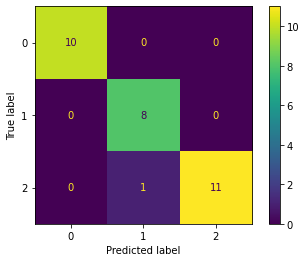

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(dt_pipeline, X_test, y_test)
plt.show()

In [9]:
from sklearn.metrics import classification_report

print(classification_report(y_test, dt_pipeline.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      1.00      0.94         8
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# Visualizing the Model

As the next step, we will try visualizing the decision tree model for classification.

In [10]:
data = load_iris()

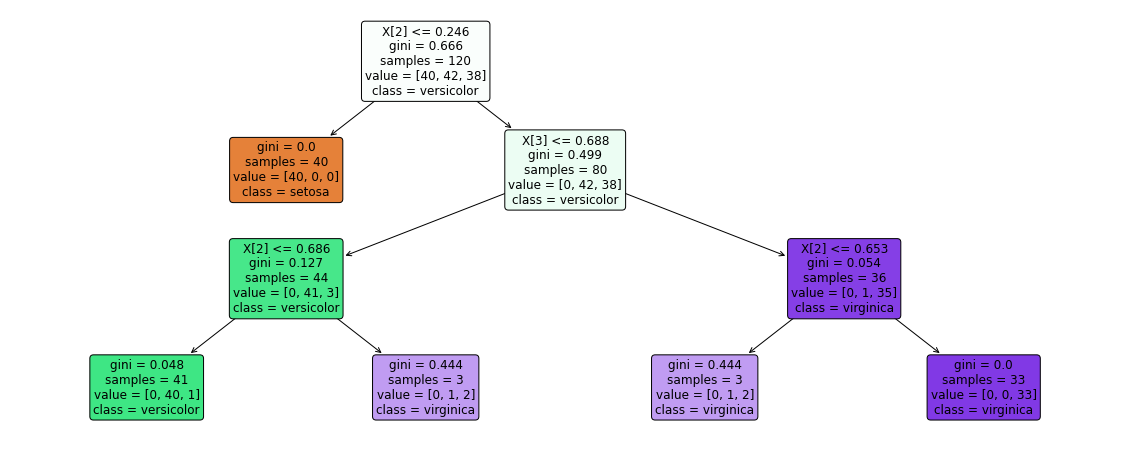

In [13]:
from sklearn.tree import plot_tree

# plt the figure, set a white background
plt.figure(figsize=(20,8), facecolor='w')
# create the tree plot
a = plot_tree(
    # The decision tree classifier
    dt_pipeline[-1],
    # The class names stored
    class_names = data.target_names,
    # asthetics
    rounded=True,
    filled=True,
    fontsize=12,
)
# Show the plot
plt.show()


Let's convert this tree representation into if-else rule set.

In [18]:
from sklearn.tree import export_text

# export the decision rules
tree_rules = export_text(
    dt_pipeline[-1],
    feature_names=list(features.columns)
)
# Print the results
print(tree_rules)

|--- petal length (cm) <= 0.25
|   |--- class: 0
|--- petal length (cm) >  0.25
|   |--- petal width (cm) <= 0.69
|   |   |--- petal length (cm) <= 0.69
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  0.69
|   |   |   |--- class: 2
|   |--- petal width (cm) >  0.69
|   |   |--- petal length (cm) <= 0.65
|   |   |   |--- class: 2
|   |   |--- petal length (cm) >  0.65
|   |   |   |--- class: 2



Let's obtain the feature importance from the trained decision tree model.

In [19]:
# extract importance
importance = pd.DataFrame({
    'feature':features.columns,
    'importance':np.round(dt_pipeline[-1].feature_importances_, 3)
})

importance.sort_values('importance', ascending=False, inplace=True)
print(importance)

             feature  importance
2  petal length (cm)        0.57
3   petal width (cm)        0.43
0  sepal length (cm)        0.00
1   sepal width (cm)        0.00


# Hyperparameter Tuning

There are $2$ configurable parameters in the Decision Tree Classifier:
- `max_depth`
- `min_samples_split`

We use `GridSearchCV` to search the hyperparameters.

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'dt_classifier__max_depth': [1,2,3,4,5],
        'dt_classifier__min_samples_split':[2,4,6,8,10]
    }
]

gs_dtc = GridSearchCV(
    dt_pipeline,
    param_grid,
    scoring='f1_macro'
)

In [22]:
gs_dtc.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('feature_scaling', MinMaxScaler()),
                                       ('dt_classifier',
                                        DecisionTreeClassifier(max_depth=3,
                                                               random_state=69))]),
             param_grid=[{'dt_classifier__max_depth': [1, 2, 3, 4, 5],
                          'dt_classifier__min_samples_split': [2, 4, 6, 8,
                                                               10]}],
             scoring='f1_macro')

In [23]:
print("Best Parameters: ", gs_dtc.best_params_)

Best Parameters:  {'dt_classifier__max_depth': 2, 'dt_classifier__min_samples_split': 2}


In [25]:
print("Grid Scores:\n")
means = gs_dtc.cv_results_["mean_test_score"]
stds = gs_dtc.cv_results_["std_test_score"]
for mean,std,params in zip(means, stds, gs_dtc.cv_results_['params']):
    print(f"{mean:0.3f} (+/-{std:0.3f}) for {params}")

Grid Scores:

0.563 (+/-0.009) for {'dt_classifier__max_depth': 1, 'dt_classifier__min_samples_split': 2}
0.563 (+/-0.009) for {'dt_classifier__max_depth': 1, 'dt_classifier__min_samples_split': 4}
0.563 (+/-0.009) for {'dt_classifier__max_depth': 1, 'dt_classifier__min_samples_split': 6}
0.563 (+/-0.009) for {'dt_classifier__max_depth': 1, 'dt_classifier__min_samples_split': 8}
0.563 (+/-0.009) for {'dt_classifier__max_depth': 1, 'dt_classifier__min_samples_split': 10}
0.958 (+/-0.038) for {'dt_classifier__max_depth': 2, 'dt_classifier__min_samples_split': 2}
0.958 (+/-0.038) for {'dt_classifier__max_depth': 2, 'dt_classifier__min_samples_split': 4}
0.958 (+/-0.038) for {'dt_classifier__max_depth': 2, 'dt_classifier__min_samples_split': 6}
0.958 (+/-0.038) for {'dt_classifier__max_depth': 2, 'dt_classifier__min_samples_split': 8}
0.958 (+/-0.038) for {'dt_classifier__max_depth': 2, 'dt_classifier__min_samples_split': 10}
0.950 (+/-0.031) for {'dt_classifier__max_depth': 3, 'dt_classif

Now, we look at the confusion matrix for the best estimator obtained via `GridSearchCV`.

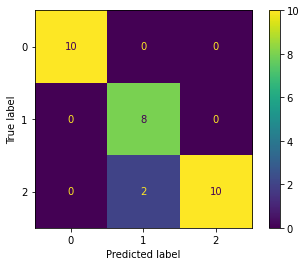

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay

best_dtc = gs_dtc.best_estimator_
ConfusionMatrixDisplay.from_estimator(best_dtc, X_test, y_test)

In [ ]:
%%time